### Notebook, Final Project Work, CAS Applied Data Science, Elena Beletsioti, University of Bern. 

# Wildlife Species Image Classification using Camera Trap Images

### Primary Objectives


The goal of this project is to classify the species that appear in camera trap images in the Taï National Park,  a national park in Côte d'Ivoire, collected by the Wild Chimpanzee Foundation and the Max Planck Institute for Evolutionary Anthropology. 

Camera traps are one of the best tools available to study and monitor wildlife populations, and the enormous amounts of data they provide can be used to track different species for conservation efforts—once they are processed.

The dataset contains 20.952 camera trap images which were captured at the Tai National Park in Côte d'Ivoire. They were assigned to either birds, civets, duikers, hogs, leopards, other monkeys, and rodents. There are also images that contain no animals. 

The aim of this project is to build a model that can help predict whether an image contains one of these seven types of species.

## 1. Import modules we may need

In [2]:
# Import necessary modules:

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# Common visualization module
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Numeric library
import numpy as np
import matplotlib.pyplot as plt


import os
import pandas as pd
from time import time as timer
import tarfile
from scipy import stats
import scipy.stats
import seaborn as sns

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

from PIL import Image
from tqdm import tqdm


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib

In [4]:
# Load data 


folder_prefix = "C:\\Users\\ebele\\Desktop\\CAS Uni Bern\\_Final Project Work\\Original Data Sets\\"
data_dir = pathlib.Path(folder_prefix)
print(data_dir)

image_count = len(list(data_dir.glob('*\*.jpg')))
print(image_count)

folder_prefix_no_escape = "C:/Users/ebele/Desktop/CAS Uni Bern/_Final Project Work/Original Data Sets/"
print(folder_prefix_no_escape)


C:\Users\ebele\Desktop\CAS Uni Bern\_Final Project Work\Original Data Sets
20952
C:/Users/ebele/Desktop/CAS Uni Bern/_Final Project Work/Original Data Sets/


In [5]:
# Import cvs files from google drive

import pandas as pd
import os

train_features = pd.read_csv(folder_prefix + "train_features.csv", index_col="id")
print("Table train features")
train_features.head()

# Validate for Train Features - that download is completed without glitch ( see Chatpter 3.3 Data Quality in Report)
num_exist = 0
num_not_exist = 0

for index, row in train_features.iterrows():
    filename = row['filepath']
    if os.path.exists(folder_prefix + filename):
        num_exist += 1
    else:
        num_not_exist += 1
        
print("Photos exist: " + str(num_exist) + " / Not exist: " + str(num_not_exist))

Table train features
Photos exist: 16488 / Not exist: 0


In [6]:
# Validate for Test Features - that download is completed without glitch ( see Chatpter 3.3 Data Quality in Report)
test_features = pd.read_csv(folder_prefix + "test_features.csv", index_col="id")
print("Table test features")
test_features.head()

num_exist = 0
num_not_exist = 0

for index, row in test_features.iterrows():
    filename = row['filepath']
    if os.path.exists(folder_prefix + filename):
        num_exist += 1
    else:
        num_not_exist += 1
        
print("Photos exist: " + str(num_exist) + " / Not exist: " + str(num_not_exist))


Table test features
Photos exist: 4464 / Not exist: 0


In [7]:
# Preview
train_labels = pd.read_csv(folder_prefix + "train_labels.csv", index_col="id")
print("Table train labels")
train_labels.head()

Table train labels


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Sort labels
species_labels = sorted(train_labels.columns.unique())
species_labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

## 2. Explore dataset

Printing image: ZJ016488.jpg


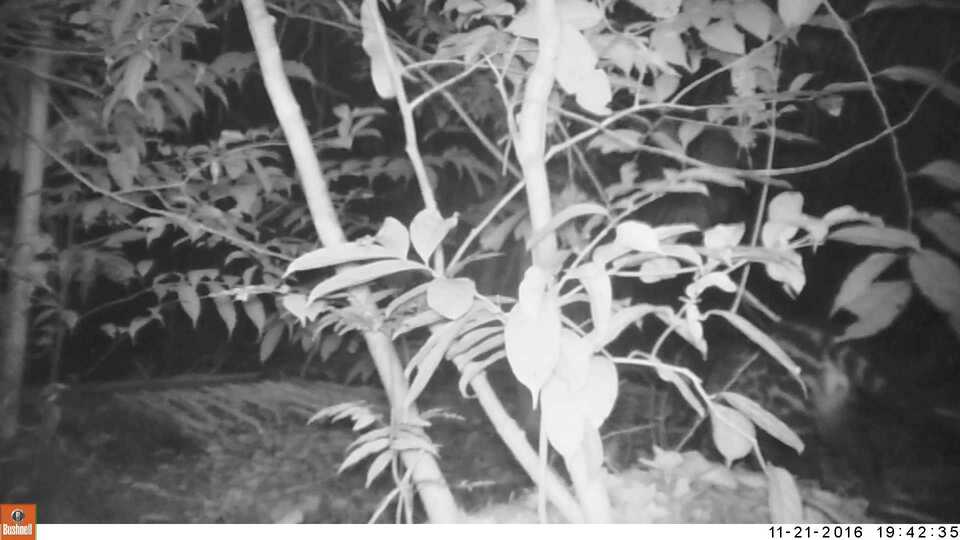

Printing image: ZJ016489.jpg


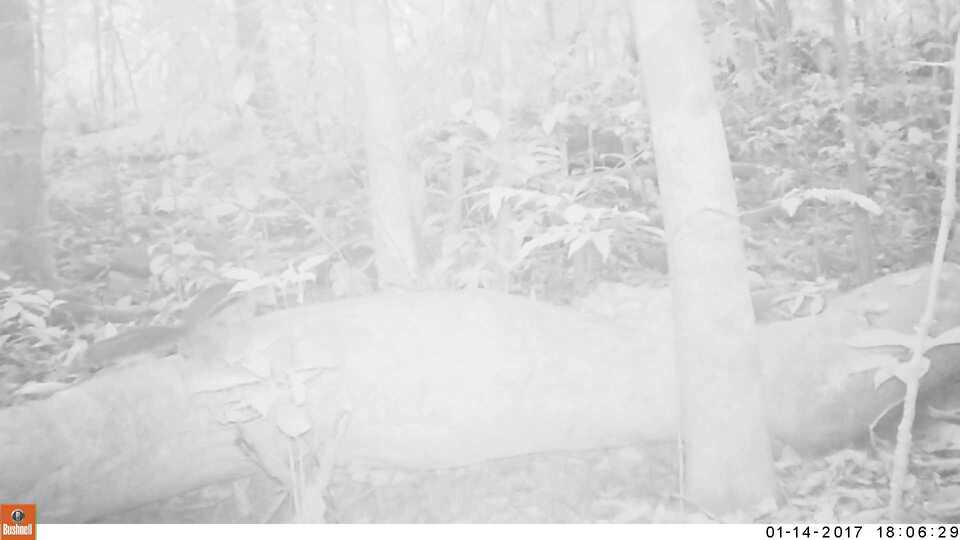

Printing image: ZJ016490.jpg


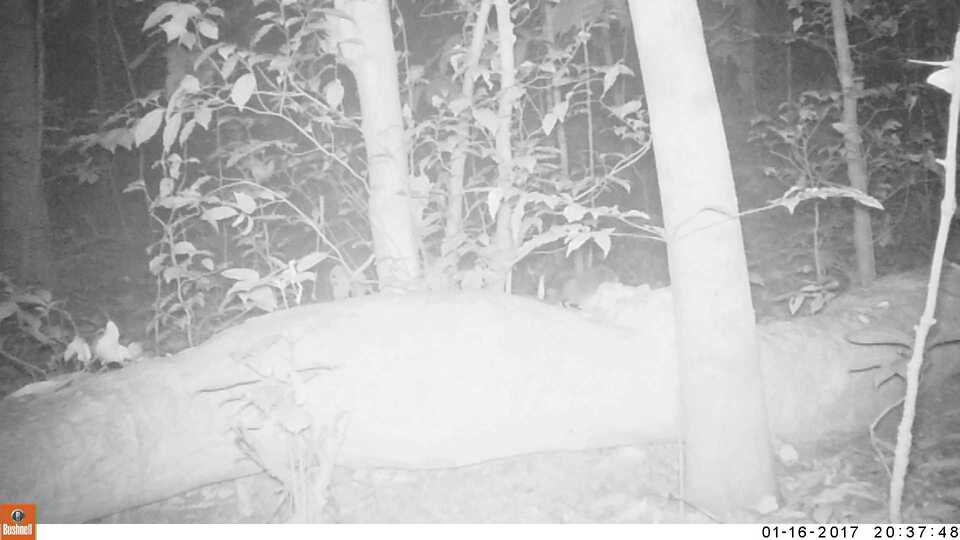

In [9]:
import os
from IPython.display import Image


# Show images from test_features folder 

path_test = folder_prefix + "test_features/"
#we shall store all the file names in this list
test_features_filelist = os.listdir(path_test)

i = 1
numPhotosPlot = 3   # Number of photos to plot

# Print all the file pictures
for filename in test_features_filelist:
    print("Printing image: " + filename)
    filepath = path_test  + filename
    display(Image(filepath))
    if i >= numPhotosPlot:
        break # Stop this for loop
    i = i + 1 



FileNotFoundError: [Errno 2] No such file or directory: 'train_features/ZJ006000.jpg'

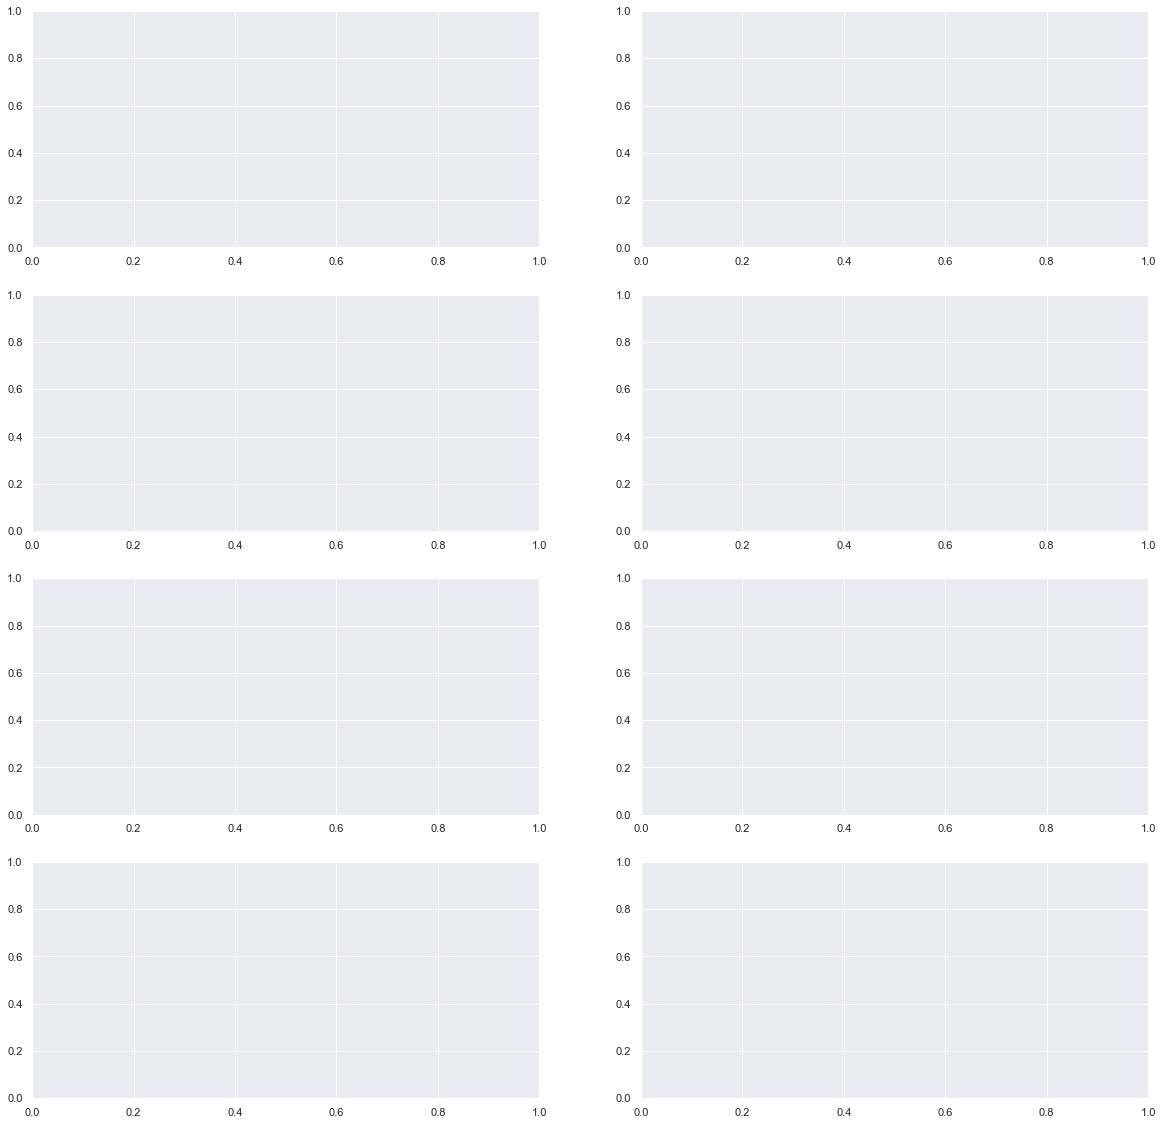

In [10]:
import matplotlib.image as mpimg

train_image_path = folder_prefix + "train_features/"
test_image_path = folder_prefix + "test_features/"

train_features_filelist = os.listdir(train_image_path)
filepath = train_image_path + filename

random_state = 42

# Create a grid with 8 positions, one for each label (7 species, plus blanks)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# Iterate through each species
for species, ax in zip(species_labels, axes.flat):
    # Image ID for this species
    img_id = (
        train_labels[train_labels.loc[:,species] == 1]
        .sample(1, random_state=random_state)
        .index[0]
    )
    # Read the filepath and return a numpy array
    img = mpimg.imread(train_features.loc[img_id].filepath)
    # Plotting 
    ax.imshow(img)
    ax.set_title(f"{img_id} | {species}")

Explore the distribution of species across the training set.

In [11]:
# Counts of species in training set
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64

In [12]:
# Percentage of species in training set
train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False)

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64

## 3. Split into Test and Evaluation Set

First, we will split the images into train and evaluation data sets. 
For the Evaluation dataset 25% of the data will be put aside. Also we stratify by the target labels to ensure we have similar relative frequencies of each class in the train and eval sets.

In [13]:
import os

image_dir = data_dir
print(image_dir)
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]

print(image_paths)

# Load the data frame in a 2D array
dataframe = pd.DataFrame({"filepath": image_paths})
print(dataframe.head)

C:\Users\ebele\Desktop\CAS Uni Bern\_Final Project Work\Original Data Sets
['C:\\Users\\ebele\\Desktop\\CAS Uni Bern\\_Final Project Work\\Original Data Sets\\test_features', 'C:\\Users\\ebele\\Desktop\\CAS Uni Bern\\_Final Project Work\\Original Data Sets\\test_features.csv', 'C:\\Users\\ebele\\Desktop\\CAS Uni Bern\\_Final Project Work\\Original Data Sets\\train_features', 'C:\\Users\\ebele\\Desktop\\CAS Uni Bern\\_Final Project Work\\Original Data Sets\\train_features.csv', 'C:\\Users\\ebele\\Desktop\\CAS Uni Bern\\_Final Project Work\\Original Data Sets\\train_labels.csv']
<bound method NDFrame.head of                                             filepath
0  C:\Users\ebele\Desktop\CAS Uni Bern\_Final Pro...
1  C:\Users\ebele\Desktop\CAS Uni Bern\_Final Pro...
2  C:\Users\ebele\Desktop\CAS Uni Bern\_Final Pro...
3  C:\Users\ebele\Desktop\CAS Uni Bern\_Final Pro...
4  C:\Users\ebele\Desktop\CAS Uni Bern\_Final Pro...>


In [14]:
from sklearn.model_selection import train_test_split

frac = 1.0

y = train_labels.sample(frac=frac, random_state=1)
#print(y.head)
x = train_features.loc[y.index].filepath.to_frame()
#print(x.head)

# note that we are casting the species labels to an indicator/dummy matrix
x_train, x_eval, y_train, y_eval = train_test_split(
    x, y, stratify=y, test_size=0.25    # Stratify data    # 25% Split
)

x_train['filepath'] = folder_prefix_no_escape + x_train['filepath'].astype("str")

We split the data into training and evaluation sets using train_test_split function. With the stratify parameter we want to ensure that the class distribution is maintained in the split datasets. 

In [15]:
x_train.head()

,filepath
id,
ZJ008661,C:/Users/ebele/Desktop/CAS Uni Bern/_Final Pro...
ZJ011365,C:/Users/ebele/Desktop/CAS Uni Bern/_Final Pro...
ZJ000363,C:/Users/ebele/Desktop/CAS Uni Bern/_Final Pro...
ZJ013949,C:/Users/ebele/Desktop/CAS Uni Bern/_Final Pro...
ZJ006936,C:/Users/ebele/Desktop/CAS Uni Bern/_Final Pro...


In [16]:
y_train.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ008661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ011365,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000363,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZJ013949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ006936,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
x_train.shape, y_train.shape, x_eval.shape, y_eval.shape

((12366, 1), (12366, 8), (4122, 1), (4122, 8))

In [18]:
split_pcts = pd.DataFrame(
    {
        "train": y_train.idxmax(axis=1).value_counts(normalize=True), # ID max to find the most common label for each row, also normalize
        "eval": y_eval.idxmax(axis=1).value_counts(normalize=True),
    }
)
print("Species percentages by split")
(split_pcts.fillna(0) * 100).astype(int)

Species percentages by split


,train,eval
monkey_prosimian,15,15
antelope_duiker,15,15
civet_genet,14,14
leopard,13,13
blank,13,13
rodent,12,12
bird,9,9
hog,5,5


In [19]:
train_image_path = folder_prefix + "train_features/"
test_image_path = folder_prefix + "test_features/"

train_image_paths = [] # Store image paths in list
classes = [] # Store class values

In [20]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms

# Cretae imagedataset class to define how to acess data and define trasnformations

class ImagesDataset(Dataset):
    """Reads in an image, transforms pixel values, and serves
    a dictionary containing the image id, image tensors, and label.
    """

    # (1) 2 Dataframes with image IDs and filepaths and apply transformations
    def __init__(self, x_df, y_df=None):
        self.data = x_df
        self.label = y_df
        self.transform = transforms.Compose(
            [
                transforms.Resize((224, 224)), # Resize images to size 224x224
                transforms.ToTensor(), # Convert image to tensor
                transforms.Normalize( # Normalize  image tensors with mean and standard deviation
                    mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
                ),
            ]
        )

    # Access a sample from the data
    def __getitem__(self, index):
        image = Image.open(self.data.iloc[index]["filepath"]).convert("RGB")
        image = self.transform(image) # Apply transformations
        image_id = self.data.index[index]
        # if we don't have labels (e.g. for test set) just return the image and image id
        if self.label is None:
            sample = {"image_id": image_id, "image": image}
        else:
            label = torch.tensor(self.label.iloc[index].values, 
                                 dtype=torch.float)
            sample = {"image_id": image_id, "image": image, "label": label}
        return sample

    def __len__(self):
        return len(self.data)

In [21]:
from torch.utils.data import DataLoader

train_dataset = ImagesDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32)

## 4. Model 1 

### 4.1 Training of Model 1

In [22]:
from torch import nn
import torchvision.models as models


model = models.resnet50(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(2048, 100),  # dense layer takes a 2048-dim input and outputs 100-dim
    nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
    nn.Dropout(0.1),  # common technique to mitigate overfitting
    nn.Linear(
        100, 8
    ),  # final dense layer outputs 8-dim corresponding to our target classes
)

C:\Users\ebele\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ebele\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
from torchsummary import summary

summary(model, (3, 2048, 100))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 1024, 50]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 1024, 50]        128
├─ReLU: 1-3                              [-1, 64, 1024, 50]        --
├─MaxPool2d: 1-4                         [-1, 64, 512, 25]         --
├─Sequential: 1-5                        [-1, 256, 512, 25]        --
|    └─Bottleneck: 2-1                   [-1, 256, 512, 25]        --
|    |    └─Conv2d: 3-1                  [-1, 64, 512, 25]         4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 512, 25]         128
|    |    └─ReLU: 3-3                    [-1, 64, 512, 25]         --
|    |    └─Conv2d: 3-4                  [-1, 64, 512, 25]         36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 512, 25]         128
|    |    └─ReLU: 3-6                    [-1, 64, 512, 25]         --
|    |    └─Conv2d: 3-7                  [-1, 256, 512, 25]        16,38

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 1024, 50]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 1024, 50]        128
├─ReLU: 1-3                              [-1, 64, 1024, 50]        --
├─MaxPool2d: 1-4                         [-1, 64, 512, 25]         --
├─Sequential: 1-5                        [-1, 256, 512, 25]        --
|    └─Bottleneck: 2-1                   [-1, 256, 512, 25]        --
|    |    └─Conv2d: 3-1                  [-1, 64, 512, 25]         4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 512, 25]         128
|    |    └─ReLU: 3-3                    [-1, 64, 512, 25]         --
|    |    └─Conv2d: 3-4                  [-1, 64, 512, 25]         36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 512, 25]         128
|    |    └─ReLU: 3-6                    [-1, 64, 512, 25]         --
|    |    └─Conv2d: 3-7                  [-1, 256, 512, 25]        16,38

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [25]:
from PIL import Image

import os
print(os.getcwd())   

# os.chdir("/gdrive/MyDrive/Final_ProjectWork/Original_Dataset/")
# print(os.getcwd())   

num_epochs = 10
batch = 128

tracking_loss = {}

for epoch in range(1, num_epochs + 1):
    print(f"Starting epoch {epoch}")

    # iterate through the dataloader batches. tqdm keeps track of progress.
    for batch_n, batch in tqdm(
        enumerate(train_dataloader), total=len(train_dataloader)
    ):

        # 1) zero out the parameter gradients so that gradients from previous batches are not used in this step
        optimizer.zero_grad()

        # 2) run the foward step on this batch of images
        outputs = model(batch["image"])

        # 3) compute the loss
        loss = criterion(outputs, batch["label"])
        # let's keep track of the loss by epoch and batch
        tracking_loss[(epoch, batch_n)] = float(loss)

        # 4) compute our gradients
        loss.backward()
        # update our weights
        optimizer.step()

  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

C:\Users\ebele\Downloads
Starting epoch 1


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 2


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 3


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 4


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 5


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 6


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 7


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 8


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 9


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 10


100%|██████████████████████████████████████████████████████████████████████████████| 387/387 [1:21:30<00:00, 12.64s/it]


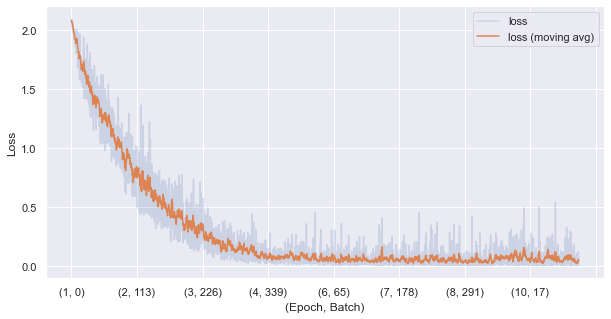

In [26]:
tracking_loss = pd.Series(tracking_loss)

plt.figure(figsize=(10, 5))
tracking_loss.plot(alpha=0.2, label="loss")
tracking_loss.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="loss (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0)

### 4.2 Evaluation of Model 1

In [42]:
eval_dataset = ImagesDataset(x_eval, y_eval)
eval_dataloader = DataLoader(eval_dataset, batch_size=32)

In [43]:
preds_collector = []

# put the model in eval mode so we don't update any parameters
model.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for batch in tqdm(eval_dataloader, total=len(eval_dataloader)):
        # 1) run the forward step
        logits = model.forward(batch["image"])
        # 2) apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # 3) store this batch's predictions in df
        # note that PyTorch Tensors need to first be detached from their computational graph before converting to numpy arrays
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=species_labels,
        )
        preds_collector.append(preds_df)

eval_preds_df = pd.concat(preds_collector)
eval_preds_df

100%|████████████████████████████████████████████████████████████████████████████████| 387/387 [31:04<00:00,  4.82s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ008661,2.524388e-04,6.780370e-06,0.000147,6.258105e-06,3.341844e-08,3.905043e-09,5.339373e-07,9.995871e-01
ZJ011365,8.504174e-02,1.254092e-04,0.907017,9.391791e-05,5.268435e-04,3.096182e-03,4.034366e-03,6.480307e-05
ZJ000363,8.776753e-03,2.355634e-03,0.868383,4.193784e-04,1.198272e-04,8.175701e-04,9.761596e-03,1.093663e-01
ZJ013949,3.703254e-06,7.488484e-07,0.000008,6.661098e-06,1.179227e-08,7.179294e-10,4.262106e-08,9.999803e-01
ZJ006936,7.587492e-08,7.001975e-06,0.000713,9.989408e-01,2.545728e-07,1.232667e-04,3.627699e-06,2.117734e-04
...,...,...,...,...,...,...,...,...
ZJ002982,9.536035e-04,8.553939e-01,0.004887,3.296988e-05,1.260484e-05,1.572733e-05,1.032635e-03,1.376718e-01
ZJ003386,9.999961e-01,1.352411e-08,0.000002,1.363429e-08,4.221592e-07,4.364292e-10,4.171283e-07,9.712741e-07
ZJ010491,4.663473e-06,4.680985e-06,0.000008,3.803094e-05,1.192173e-06,1.564732e-08,5.279785e-09,9.999439e-01
ZJ007858,9.559956e-04,6.288602e-07,0.000332,5.475666e-07,3.329965e-08,1.283702e-06,9.987087e-01,7.874153e-07


In [44]:
# Predicted labels distribution
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

True labels (training):


monkey_prosimian    1869
antelope_duiker     1855
civet_genet         1817
leopard             1691
blank               1660
rodent              1510
bird                1231
hog                  733
dtype: int64

In [45]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

Predicted labels (eval):


monkey_prosimian    1914
antelope_duiker     1857
civet_genet         1821
leopard             1721
blank               1574
rodent              1490
bird                1261
hog                  728
dtype: int64

In [46]:
print("True labels (eval):")
y_eval.idxmax(axis=1).value_counts()

True labels (eval):


monkey_prosimian    623
antelope_duiker     619
civet_genet         606
leopard             563
blank               553
rodent              503
bird                410
hog                 245
dtype: int64

In [47]:
# Accuracy of  Model 1
## Show labels with the highest score for each image

eval_predictions = eval_preds_df.idxmax(axis=1)
eval_predictions.head()

ZJ008661         rodent
ZJ011365          blank
ZJ000363          blank
ZJ013949         rodent
ZJ006936    civet_genet
dtype: object

In [48]:
eval_true = y_eval.idxmax(axis=1)

(eval_true == "monkey_prosimian").sum() / len(eval_predictions)

0.05038007439754165

In [49]:
(eval_true == "antelope_duiker").sum() / len(eval_predictions)

0.05005660682516578

In [50]:
(eval_true == "civet_genet").sum() / len(eval_predictions)

0.049005337214944204

In [51]:
(eval_true == "leopard").sum() / len(eval_predictions)

0.04552806081190361

In [52]:
(eval_true == "blank").sum() / len(eval_predictions)

0.04471939188096393

In [53]:
(eval_true == "rodent").sum() / len(eval_predictions)

0.04067604722626557

In [54]:
(eval_true == "bird").sum() / len(eval_predictions)

0.033155426168526604

In [55]:
(eval_true == "hog").sum() / len(eval_predictions)

0.019812388808021997

In [56]:
#correct = (eval_predictions == eval_true).sum()
#accuracy = correct / len(eval_predictions)
#accuracy

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

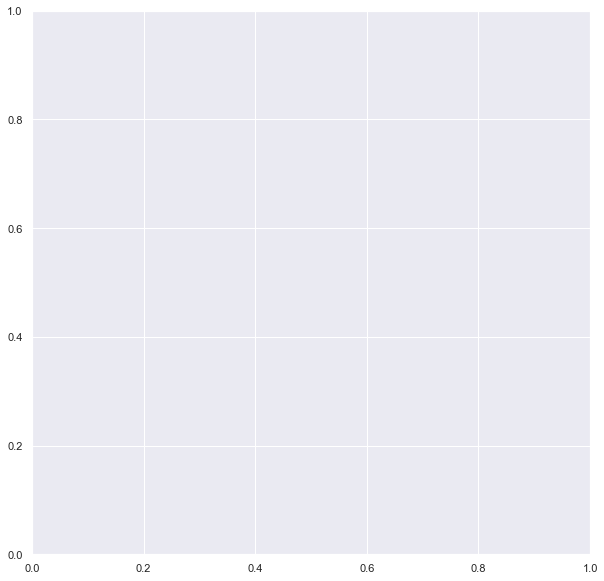

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = ConfusionMatrixDisplay.from_predictions(
    y_eval.idxmax(axis=1),
    eval_preds_df.idxmax(axis=1),
    ax=ax,
    xticks_rotation=90,
    colorbar=True,
)

### 4.3 Prediction on Test Dataset

In [59]:
test_dataset = ImagesDataset(test_features.filepath.to_frame())
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [60]:
preds_collector = []

model.eval()

with torch.no_grad():
    for batch in tqdm(test_dataloader, total=len(test_dataloader)):
        # run the forward step
        logits = model.forward(batch["image"])
        # apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # store this batch's predictions in df
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=species_labels,
        )
        preds_collector.append(preds_df)

predicted_test_nolabel = pd.concat(preds_collector)
predicted_test_nolabel

100%|████████████████████████████████████████████████████████████████████████████████| 387/387 [30:38<00:00,  4.75s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ008661,2.524388e-04,6.780370e-06,0.000147,6.258105e-06,3.341844e-08,3.905043e-09,5.339373e-07,9.995871e-01
ZJ011365,8.504174e-02,1.254092e-04,0.907017,9.391791e-05,5.268435e-04,3.096182e-03,4.034366e-03,6.480307e-05
ZJ000363,8.776753e-03,2.355634e-03,0.868383,4.193784e-04,1.198272e-04,8.175701e-04,9.761596e-03,1.093663e-01
ZJ013949,3.703254e-06,7.488484e-07,0.000008,6.661098e-06,1.179227e-08,7.179294e-10,4.262106e-08,9.999803e-01
ZJ006936,7.587492e-08,7.001975e-06,0.000713,9.989408e-01,2.545728e-07,1.232667e-04,3.627699e-06,2.117734e-04
...,...,...,...,...,...,...,...,...
ZJ002982,9.536035e-04,8.553939e-01,0.004887,3.296988e-05,1.260484e-05,1.572733e-05,1.032635e-03,1.376718e-01
ZJ003386,9.999961e-01,1.352411e-08,0.000002,1.363429e-08,4.221592e-07,4.364292e-10,4.171283e-07,9.712741e-07
ZJ010491,4.663473e-06,4.680985e-06,0.000008,3.803094e-05,1.192173e-06,1.564732e-08,5.279785e-09,9.999439e-01
ZJ007858,9.559956e-04,6.288602e-07,0.000332,5.475666e-07,3.329965e-08,1.283702e-06,9.987087e-01,7.874153e-07


## 5. Model 2

### 5.1 Training of Model 2

In [61]:
# Load the pretrained AlexNet model
model2 = models.alexnet(pretrained=True)

# Modify the classifier 
model2.classifier = nn.Sequential(
    nn.Linear(9216, 100),  # input size to matches AlexNet's output
    nn.ReLU(inplace=True),  # ReLU activation introduces non-linearity
    nn.Dropout(0.1),  # Common technique to mitigate overfitting
    nn.Linear(
        100, 8
    ),  # Final dense layer outputs 8-dim 
)

C:\Users\ebele\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ebele\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [62]:
from torchsummary import summary

summary(model2, (3, 2048, 100))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 63, 2]          --
|    └─Conv2d: 2-1                       [-1, 64, 511, 24]         23,296
|    └─ReLU: 2-2                         [-1, 64, 511, 24]         --
|    └─MaxPool2d: 2-3                    [-1, 64, 255, 11]         --
|    └─Conv2d: 2-4                       [-1, 192, 255, 11]        307,392
|    └─ReLU: 2-5                         [-1, 192, 255, 11]        --
|    └─MaxPool2d: 2-6                    [-1, 192, 127, 5]         --
|    └─Conv2d: 2-7                       [-1, 384, 127, 5]         663,936
|    └─ReLU: 2-8                         [-1, 384, 127, 5]         --
|    └─Conv2d: 2-9                       [-1, 256, 127, 5]         884,992
|    └─ReLU: 2-10                        [-1, 256, 127, 5]         --
|    └─Conv2d: 2-11                      [-1, 256, 127, 5]         590,080
|    └─ReLU: 2-12                        [-1, 256, 127, 5]   

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 63, 2]          --
|    └─Conv2d: 2-1                       [-1, 64, 511, 24]         23,296
|    └─ReLU: 2-2                         [-1, 64, 511, 24]         --
|    └─MaxPool2d: 2-3                    [-1, 64, 255, 11]         --
|    └─Conv2d: 2-4                       [-1, 192, 255, 11]        307,392
|    └─ReLU: 2-5                         [-1, 192, 255, 11]        --
|    └─MaxPool2d: 2-6                    [-1, 192, 127, 5]         --
|    └─Conv2d: 2-7                       [-1, 384, 127, 5]         663,936
|    └─ReLU: 2-8                         [-1, 384, 127, 5]         --
|    └─Conv2d: 2-9                       [-1, 256, 127, 5]         884,992
|    └─ReLU: 2-10                        [-1, 256, 127, 5]         --
|    └─Conv2d: 2-11                      [-1, 256, 127, 5]         590,080
|    └─ReLU: 2-12                        [-1, 256, 127, 5]   

In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.0001, momentum=0.9)

In [64]:
from PIL import Image

import os
print(os.getcwd())     

num_epochs = 10
batch = 128

tracking_loss = {}

for epoch in range(1, num_epochs + 1):
    print(f"Starting epoch {epoch}")

    # iterate through the dataloader batches. tqdm keeps track of progress.
    for batch_n, batch in tqdm(
        enumerate(train_dataloader), total=len(train_dataloader)
    ):

        # 1) zero out the parameter gradients so that gradients from previous batches are not used in this step
        optimizer.zero_grad()

        # 2) run the foward step on this batch of images
        outputs = model2(batch["image"])

        # 3) compute the loss
        loss = criterion(outputs, batch["label"])
        # let's keep track of the loss by epoch and batch
        tracking_loss[(epoch, batch_n)] = float(loss)

        # 4) compute our gradients
        loss.backward()
        # update our weights
        optimizer.step()

  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

C:\Users\ebele\Downloads
Starting epoch 1


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 2


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 3


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 4


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 5


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 6


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 7


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 8


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 9


  0%|                                                                                          | 0/387 [00:00<?, ?it/s]

Starting epoch 10


100%|████████████████████████████████████████████████████████████████████████████████| 387/387 [09:24<00:00,  1.46s/it]


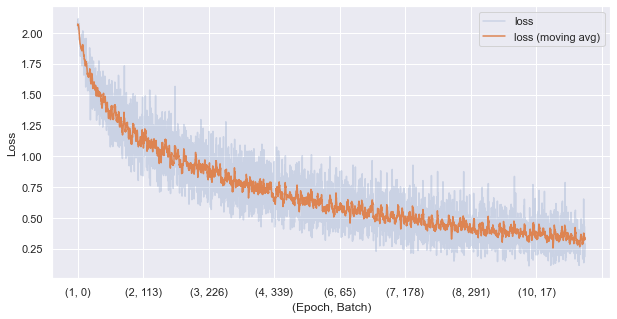

In [65]:
tracking_loss = pd.Series(tracking_loss)

plt.figure(figsize=(10, 5))
tracking_loss.plot(alpha=0.2, label="loss")
tracking_loss.rolling(center=True, min_periods=1, window=10).mean().plot(
    label="loss (moving avg)"
)
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0)

### 5.2 Evaluation of Model 2

In [66]:
eval_dataset = ImagesDataset(x_eval, y_eval)
eval_dataloader = DataLoader(train_dataset, batch_size=32)

In [67]:
preds_collector = []

# put the model in eval mode so we don't update any parameters
model2.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for batch in tqdm(eval_dataloader, total=len(eval_dataloader)):
        # 1) run the forward step
        logits = model.forward(batch["image"])
        # 2) apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # 3) store this batch's predictions in df
        # note that PyTorch Tensors need to first be detached from their computational graph before converting to numpy arrays
        preds_df2 = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=species_labels,
        )
        preds_collector.append(preds_df2)

eval_preds_df2 = pd.concat(preds_collector)
eval_preds_df2

100%|████████████████████████████████████████████████████████████████████████████████| 387/387 [27:31<00:00,  4.27s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ008661,2.524388e-04,6.780370e-06,0.000147,6.258105e-06,3.341844e-08,3.905043e-09,5.339373e-07,9.995871e-01
ZJ011365,8.504174e-02,1.254092e-04,0.907017,9.391791e-05,5.268435e-04,3.096182e-03,4.034366e-03,6.480307e-05
ZJ000363,8.776753e-03,2.355634e-03,0.868383,4.193784e-04,1.198272e-04,8.175701e-04,9.761596e-03,1.093663e-01
ZJ013949,3.703254e-06,7.488484e-07,0.000008,6.661098e-06,1.179227e-08,7.179294e-10,4.262106e-08,9.999803e-01
ZJ006936,7.587492e-08,7.001975e-06,0.000713,9.989408e-01,2.545728e-07,1.232667e-04,3.627699e-06,2.117734e-04
...,...,...,...,...,...,...,...,...
ZJ002982,9.536035e-04,8.553939e-01,0.004887,3.296988e-05,1.260484e-05,1.572733e-05,1.032635e-03,1.376718e-01
ZJ003386,9.999961e-01,1.352411e-08,0.000002,1.363429e-08,4.221592e-07,4.364292e-10,4.171283e-07,9.712741e-07
ZJ010491,4.663473e-06,4.680985e-06,0.000008,3.803094e-05,1.192173e-06,1.564732e-08,5.279785e-09,9.999439e-01
ZJ007858,9.559956e-04,6.288602e-07,0.000332,5.475666e-07,3.329965e-08,1.283702e-06,9.987087e-01,7.874153e-07


In [68]:
# Predicted labels distribution
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

True labels (training):


monkey_prosimian    1869
antelope_duiker     1855
civet_genet         1817
leopard             1691
blank               1660
rodent              1510
bird                1231
hog                  733
dtype: int64

In [69]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

Predicted labels (eval):


monkey_prosimian    1914
antelope_duiker     1857
civet_genet         1821
leopard             1721
blank               1574
rodent              1490
bird                1261
hog                  728
dtype: int64

In [70]:
print("True labels (eval):")
y_eval.idxmax(axis=1).value_counts()

True labels (eval):


monkey_prosimian    623
antelope_duiker     619
civet_genet         606
leopard             563
blank               553
rodent              503
bird                410
hog                 245
dtype: int64

In [71]:
eval_true = y_eval.idxmax(axis=1)

(eval_true == "monkey_prosimian").sum() / len(eval_predictions)

0.05038007439754165

In [72]:
(eval_true == "antelope_duiker").sum() / len(eval_predictions)

0.05005660682516578

In [73]:
(eval_true == "civet_genet").sum() / len(eval_predictions)

0.049005337214944204

In [74]:
(eval_true == "leopard").sum() / len(eval_predictions)

0.04552806081190361

In [75]:
(eval_true == "blank").sum() / len(eval_predictions)

0.04471939188096393

In [76]:
(eval_true == "rodent").sum() / len(eval_predictions)

0.04067604722626557

In [77]:
(eval_true == "bird").sum() / len(eval_predictions)

0.033155426168526604

In [78]:
(eval_true == "hog").sum() / len(eval_predictions)

0.019812388808021997

ValueError: Found input variables with inconsistent numbers of samples: [4122, 12366]

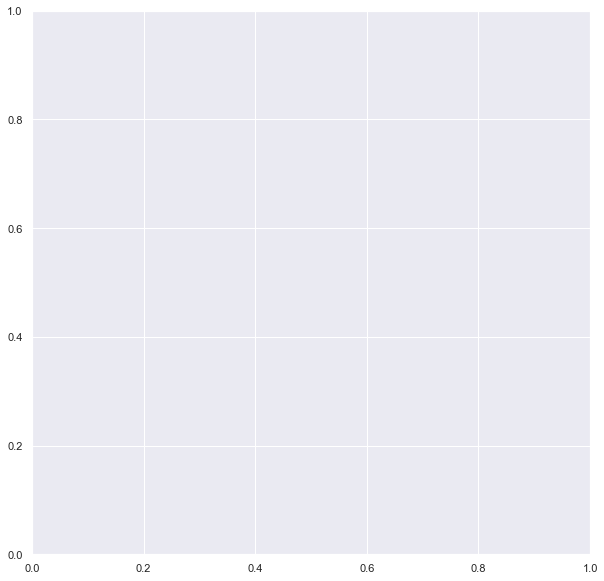

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = ConfusionMatrixDisplay.from_predictions(
    y_eval.idxmax(axis=1),
    eval_preds_df.idxmax(axis=1),
    ax=ax,
    xticks_rotation=90,
    colorbar=True,
)

In [80]:
### 5.3 Prediction on Test Dataset

In [81]:
test_dataset = ImagesDataset(test_features.filepath.to_frame())
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [82]:
preds_collector = []

model2.eval()

with torch.no_grad():
    for batch in tqdm(test_dataloader, total=len(test_dataloader)):
        # run the forward step
        logits = model2.forward(batch["image"])
        # apply softmax so that model outputs are in range [0,1]
        preds = nn.functional.softmax(logits, dim=1)
        # store this batch's predictions in df
        preds_df = pd.DataFrame(
            preds.detach().numpy(),
            index=batch["image_id"],
            columns=species_labels,
        )
        preds_collector.append(preds_df)

predicted_test_nolabel2 = pd.concat(preds_collector)
predicted_test_nolabel2

100%|████████████████████████████████████████████████████████████████████████████████| 387/387 [04:51<00:00,  1.33it/s]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ008661,0.007329,0.032709,0.015101,0.000254,0.000119,0.000614,0.008012,0.935861
ZJ011365,0.823700,0.000671,0.056891,0.000013,0.045689,0.071205,0.000632,0.001199
ZJ000363,0.242345,0.009500,0.407502,0.001653,0.130218,0.031847,0.061709,0.115227
ZJ013949,0.000384,0.005500,0.002155,0.000123,0.000056,0.000100,0.004795,0.986887
ZJ006936,0.020984,0.001726,0.073536,0.881430,0.002196,0.002400,0.000048,0.017680
...,...,...,...,...,...,...,...,...
ZJ002982,0.093211,0.435883,0.098688,0.006269,0.037743,0.003873,0.060434,0.263899
ZJ003386,0.973679,0.000193,0.020771,0.000003,0.000033,0.000033,0.005209,0.000080
ZJ010491,0.000191,0.000077,0.002485,0.005573,0.000716,0.000062,0.000021,0.990874
ZJ007858,0.007584,0.000017,0.003423,0.000010,0.000002,0.000650,0.985819,0.002497
